In [113]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [114]:
import io

In [116]:
from google.colab import files
uploaded = files.upload()

Saving TSLA.csv to TSLA (2).csv


In [118]:
df = pd.read_csv(io.BytesIO(uploaded['TSLA (2).csv']))
print(df)

           Date       Open       High        Low      Close  Adj Close  \
0     6/30/2010   1.719333   2.028000   1.553333   1.588667   1.588667   
1      7/1/2010   1.666667   1.728000   1.351333   1.464000   1.464000   
2      7/2/2010   1.533333   1.540000   1.247333   1.280000   1.280000   
3      7/6/2010   1.333333   1.333333   1.055333   1.074000   1.074000   
4      7/7/2010   1.093333   1.108667   0.998667   1.053333   1.053333   
...         ...        ...        ...        ...        ...        ...   
2512  6/23/2020  66.592003  67.466667  66.267334  66.785332  66.785332   
2513  6/24/2020  66.274002  66.725334  63.542667  64.056664  64.056664   
2514  6/25/2020  63.618000  65.732002  62.476665  65.732002  65.732002   
2515  6/26/2020  66.318665  66.333336  63.658001  63.982666  63.982666   
2516  6/29/2020  64.600670  67.333336  63.234669  67.290001  67.290001   

        Average  
0      1.695600  
1      1.534800  
2      1.376133  
3      1.174000  
4      1.061467  
...

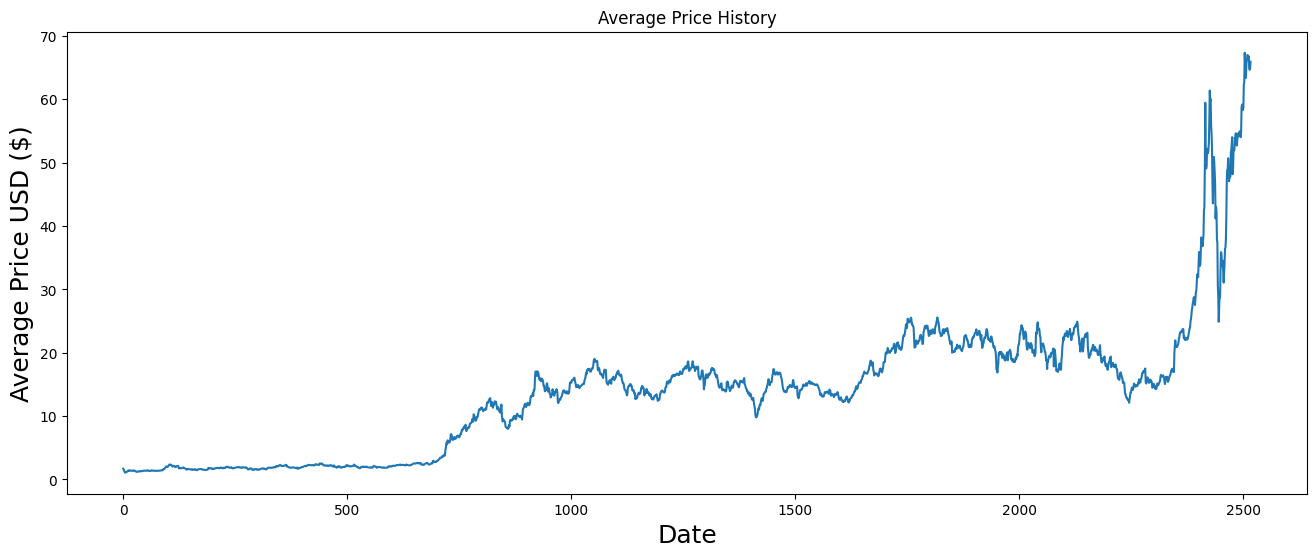

In [101]:
plt.figure(figsize=(16,6))
plt.title('Average Price History')
plt.plot(df['Average'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Average Price USD ($)', fontsize=18)
plt.show()

In [102]:
data = df.filter(['Average'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * 0.95 ))
window_size = 60
training_data_len

2392

In [103]:
sc = StandardScaler()
scaled_data = sc.fit_transform(dataset)
print('scaled_data.shape', len(dataset))
scaled_data

scaled_data.shape 2517


array([[-1.11766081],
       [-1.13232048],
       [-1.14678567],
       ...,
       [ 4.62245077],
       [ 4.64040455],
       [ 4.74020231]])

In [104]:
train_data = scaled_data[0: int(training_data_len)]
x_train = []
y_train = []

for i in range(window_size, len(train_data)):
    x_train.append(train_data[i-window_size:i, 0])
    y_train.append(train_data[i, 0])
    if i <= window_size + 1:
      print('x_train', x_train)
      print('\n y_train', y_train)
      print()

x_train = np.array(x_train)
y_train = np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print('x_train.shape', x_train.shape)

x_train [array([-1.11766081, -1.13232048, -1.14678567, -1.16521358, -1.17547291,
       -1.16995425, -1.16669656, -1.16634402, -1.16380352, -1.15612116,
       -1.15042019, -1.14663978, -1.1405255 , -1.14539991, -1.14886428,
       -1.14567948, -1.14292018, -1.14436669, -1.14649391, -1.14655472,
       -1.14783103, -1.15060252, -1.14626295, -1.14136427, -1.14157091,
       -1.14577674, -1.1519518 , -1.15247446, -1.15533103, -1.16136024,
       -1.16492185, -1.16171277, -1.15911146, -1.15623056, -1.15637645,
       -1.15834564, -1.15740968, -1.15221921, -1.15517304, -1.15372651,
       -1.15158711, -1.15248664, -1.15161143, -1.15343476, -1.14970301,
       -1.14577674, -1.14469491, -1.14680997, -1.14581322, -1.14563087,
       -1.14852391, -1.14615357, -1.1447192 , -1.14129132, -1.14092665,
       -1.14752715, -1.1454607 , -1.14503522, -1.14903443, -1.15232861])]

 y_train [-1.1506997624066244]

x_train [array([-1.11766081, -1.13232048, -1.14678567, -1.16521358, -1.17547291,
       -1.1

In [105]:
print(x_train.shape[1])

60


In [106]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
!pip install layers

In [107]:
import tensorflow as tf

In [108]:
def build_lstm_model():
  input = tf.keras.layers.Input(shape = (x_train.shape[1], 1), name = 'input')
  x = tf.keras.layers.Bidirectional(LSTM(128, return_sequences = True))(input)
  x = tf.keras.layers.Bidirectional(LSTM(64, return_sequences = False, dropout = 0.5))(x)
  output = tf.keras.layers.Dense(1, name = "last_dense")(x)
  model = tf.keras.Model(inputs = input, outputs = output)
  return model

LSTM_model = build_lstm_model()
LSTM_model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 60, 1)]           0         
                                                                 
 bidirectional_10 (Bidirect  (None, 60, 256)           133120    
 ional)                                                          
                                                                 
 bidirectional_11 (Bidirect  (None, 128)               164352    
 ional)                                                          
                                                                 
 last_dense (Dense)          (None, 1)                 129       
                                                                 
Total params: 297601 (1.14 MB)
Trainable params: 297601 (1.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [109]:
epochs = 50
batch_size = 32
early_stopping_patience = 20

LSTM_model.compile(optimizer = 'adam', loss = 'mean_squared_error')
price = LSTM_model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs)

Epoch 1/50
73/73 [==============================] - 42s 346ms/step - loss: 0.0317
Epoch 2/50
73/73 [==============================] - 21s 285ms/step - loss: 0.0054
Epoch 3/50
73/73 [==============================] - 20s 268ms/step - loss: 0.0044
Epoch 4/50
73/73 [==============================] - 21s 284ms/step - loss: 0.0038
Epoch 5/50
73/73 [==============================] - 20s 270ms/step - loss: 0.0036
Epoch 6/50
73/73 [==============================] - 21s 282ms/step - loss: 0.0033
Epoch 7/50
73/73 [==============================] - 21s 286ms/step - loss: 0.0031
Epoch 8/50
73/73 [==============================] - 20s 268ms/step - loss: 0.0031
Epoch 9/50
73/73 [==============================] - 21s 284ms/step - loss: 0.0032
Epoch 10/50
73/73 [==============================] - 20s 273ms/step - loss: 0.0027
Epoch 11/50
73/73 [==============================] - 21s 283ms/step - loss: 0.0027
Epoch 12/50
73/73 [==============================] - 21s 285ms/step - loss: 0.0028
Epoch 13/50
7

In [110]:
test_data = scaled_data[training_data_len - window_size: ]
print('len(test_data): ', len(test_data))

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(window_size, len(test_data)):
  x_test.append(test_data[i - window_size:i, 0])

x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = LSTM_model.predict(x_test)
predictions = sc.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

len(test_data):  185
4/4 [==============================] - 2s 77ms/step


8.553393499430719

<ipython-input-111-8f188311654f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = predictions


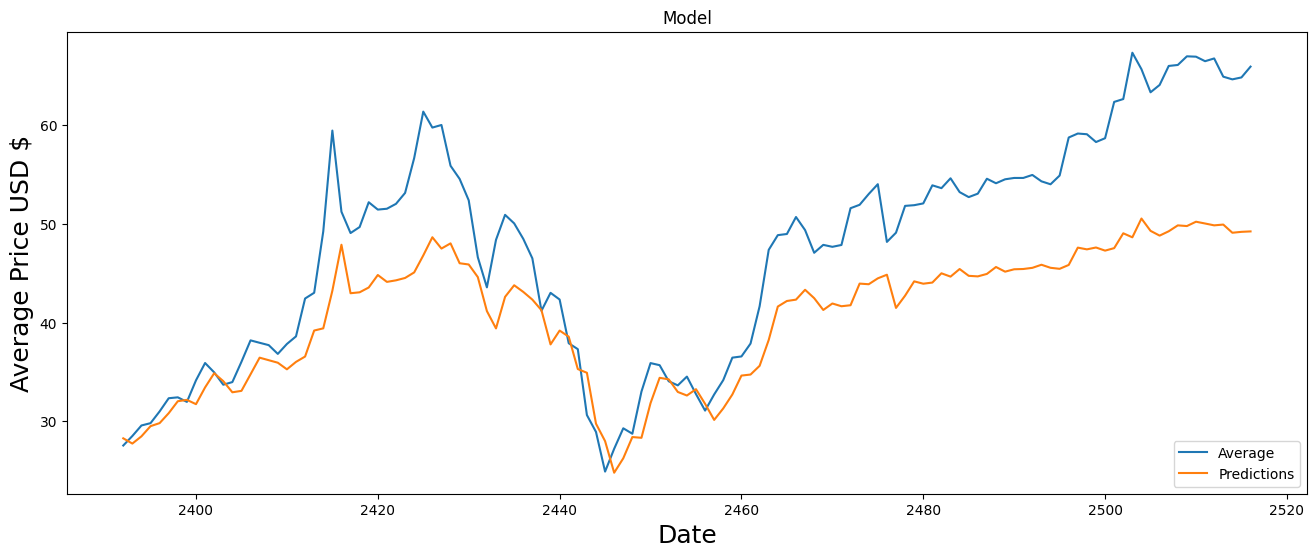

In [111]:
train = data[: training_data_len]
test = data[training_data_len: ]
test['Predictions'] = predictions

plt.figure(figsize = (16, 6))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Average Price USD $', fontsize = 18)
plt.plot(test[['Average', 'Predictions']])
plt.legend(['Average', 'Predictions'], loc = 'lower right')
plt.show()

In [112]:
test[:]

,Average,Predictions
2392,27.533733,28.263191
2393,28.499066,27.731293
2394,29.565867,28.465172
2395,29.801467,29.497665
2396,30.993466,29.805698
...,...,...
2512,66.779334,49.856468
2513,64.931066,49.936123
2514,64.658134,49.106422
2515,64.855067,49.198441
